# Lab 1

# Business Understanding

### Describe the purpose of the data set you selected 
- *Why was this data collected in the first place?* - The data set selected is the "UNSW_NB15" network traffic data set. The data set was created to evalutate Network Intrusion Detection Systems (NIDS). According to the creators of the data set, N. Moustafa and J. Slay from the Australian Defence Force Academy, the "quality of a NIDS data set reflects two important characteristics: comprehensive reflection of contemporary threats and an inclusive normal range of traffic [1]." Before this data set was generated, they argued that existing data sets used to train and test NIDS were not representative of current traffic flows and threats.
- Describe how you would define and measure the outcomes from the dataset. That is: 
    - *Why is this data important?* - The importance of this data set is that it will allow NIDS to be evaluted better, which will increase their performance, increase their protective power and reduce the chance of false positives and false negatives.
    - *How do you know if you have mined useful knowledge from the dataset?* - We will know we mined useful knowledge from the data set if we can determine, based on a collection of packets of traffic data, whether the features of those packets indicate an attack or just normal traffic.
    - *How would you measure the effectiveness of a good prediction algorithm? Be specific.* - Finding a model that predicts from the network traffic whether an attack is occuring or not, and, if there is an attack, which category of attack if occuring, will measure the effectiveness of the model. Determining if an attack is occuring is the basis of the model and with refinement, we will try to search for categorizing the attack.

# Data Understanding

In [2]:
# Imports
from pandas.tools.plotting import scatter_matrix
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
pd.set_option('display.max_columns', None)    # set the max columns to show to unlimited

%matplotlib inline

In [3]:
# Load UNSW_NB15 into a Pandas dataframe
df = pd.read_csv('UNSW_NB15_training_set.csv')

### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

## UNSW_NB15_training_set
- A Network Intrusion Data Set.
    - 82332 rows x 45 columns
        - **id** *int* The id of the record
        - **dur** *float* Record's total duration
        - **proto** *Nominal* Tranaction Protocol
        - **service** *Nominal* http, ftp, ssh, dns, ..., else(-)
        - **state** *Nominal* The state and its dependent protocol e.g. ACC, CLO, FIN, INT, ..., else (-)
		- **spkts** *int* Source to destination packet count
		- **dpkts** *int* Destination to source packet count 
		- **sbytes** *int* Source to destination bytes
		- **dbytes** *int* Destination to source bytes
		- **rate** *float* We were unable to find a description of rate. It does contain outliers, but we were unable to find reason to throw it out. So we kept it at any *rate*
		- **sttl** *int* Source to destination bytes
		- **dttl** *int* Destination to source time to live
		- **sload** *float* Source bits per second
		- **dload** *float* Destination bits per second
		- **sloss** *int* Source packets retransmitted or dropped
		- **dloss** *int* Destination packets retransmitted or dropped
		- **sinpkt** *float* Source inter-packet arrival time(mSec)
		- **dinpkt** *float* Destination inetr-packet arrival time(mSec)
		- **sjit** *float* Source jitter (mSec)
		- **djit** *float* Destination jitter(mSec)
		- **swin** *int* Source TCP window advertisment
		- **stcpb** *int* Source TCP sequence number
		- **dtcpb** *int* Destination TCP sequence number
		- **dwin** *int* Destination TCP window advertisment
		- **tcprtt** *float* The sum of 'synack' and 'ackdat' of the TCP
		- **synack** *float* The time between the SYN and the SYN_ACK packets of the TCP
		- **ackdat** *float* The time between the SYN_ACK and the ACK packets of the TCP
		- **smean** *int* Mean of the flow packet size transmitted by the sre
		- **dmean** *int* Mean of the flow packet size transmitted by the dst
		- **trans_depth** *int* The depth into the connection of the http request/response transaction
		- **response_body_len** *int* The content size of the data transferred from the server's http service
		- **ct_srv_src** *int* No. of Connection that contain the same service (14) and source address in 100 connections according to the last time
		- **ct_state_ttl** *int* No. for each state (6) according to specific range if value for source/destination time to live
		- **ct_dst_ltm** *int* No of connectiuon of the same destination address (3) in 100 connections according to the last time
		- **ct_src_dport_ltm** *int* No. of connection of the same source address and the destination port in 100 connections according to the last time
		- **ct_dst_sport_ltm** *int* No. of connnection of the same destination address(3) and the source port (2) in 100 connection according to the last time (26).
		- **ct_dst_src_ltm** *int* No connection of the same cource (1) and the destination (3) address in 100 connection according to the last time (26)
		- **is_ftp_login** *byte* If the ftp session is accessed by user and password then 1 else 0
		- **ct_ftp_cmd** *int* No. of flows that has a command in ftp session
		- **ct_flw_http_mthd** *int* No. of flows that has methof such as Get and Post in http service
		- **ct_src_ltm** *int* No of connections of the same source address (1) in 100 connection according to the last time(26).
		- **ct_srv_dst** *int* No. of connectio that conbtain the same service and destination address in 100 connection according to the last time
		- **is_sm_ips_ports** *byte* If source equals to destination (3) IP addresses and port numbers (2)(4) are equal, this variable takes value 1 else 0
		- **attack_cat** *Nominal* The name of each attack category. In this data set, nine categories (e.g. Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms)
		- **label** *byte* 0 for normal and 1 for attack records

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
﻿id                  82332 non-null int64
dur                  82332 non-null float64
proto                82332 non-null object
service              82332 non-null object
state                82332 non-null object
spkts                82332 non-null int64
dpkts                82332 non-null int64
sbytes               82332 non-null int64
dbytes               82332 non-null int64
rate                 82332 non-null float64
sttl                 82332 non-null int64
dttl                 82332 non-null int64
sload                82332 non-null float64
dload                82332 non-null float64
sloss                82332 non-null int64
dloss                82332 non-null int64
sinpkt               82332 non-null float64
dinpkt               82332 non-null float64
sjit                 82332 non-null float64
djit                 82332 non-null float64
swin                 82332 non-n

In [19]:
# df.describe() calculates the count, mean, standard deviation, min, max, and quartiles 
# of the data less the nominal (object) columns. 
df.describe()

,﻿id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557928,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052595,0.048816,100.000000,87.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [26]:
# List the unique values of each nominal column
header = df.columns.values.tolist()
for column in header:
    if column in df.select_dtypes(include=["object"]):
        print column + ":\n", df[column].unique()

proto:
['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 'iatp' 'stp' 'srp' 'uti' 'sm'
 'smp' 'isis' 'ptp' 'fire' 'crtp' 'crudp' 'sccop

In [ ]:
# Ravi
# Boxplots

### Verify data quality: Explain any missing values, duplicate data, and outliers.
    - Are those mistakes? How do you deal with these problems? Be specific.

In [ ]:
# Daniel
# is_ftp_login
# mention ID feature

# Ravi 
# pick out the box plots with outliers

###  Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. 
    - Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful. 

In [ ]:
# Daniel 
# explain the five we chose

### Visualize the most important attributes appropriately (at least 5 attributes).
    - Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate. 

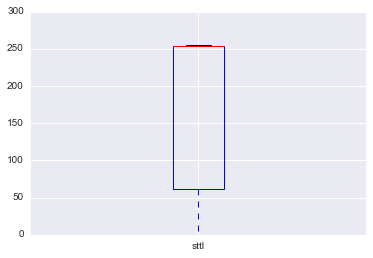

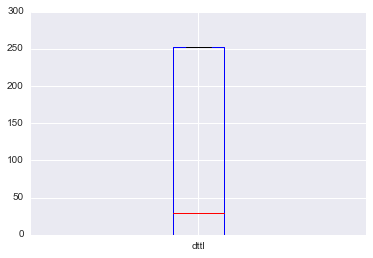

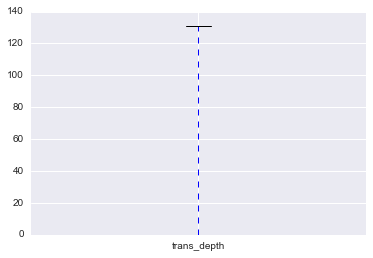

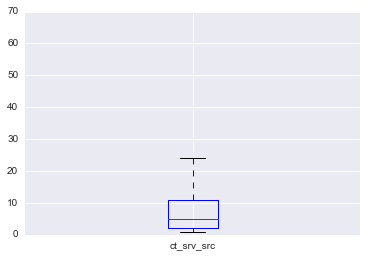

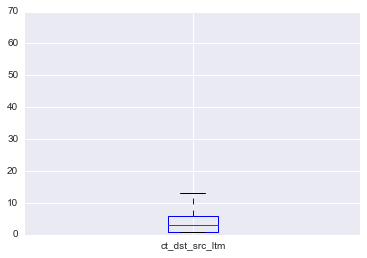

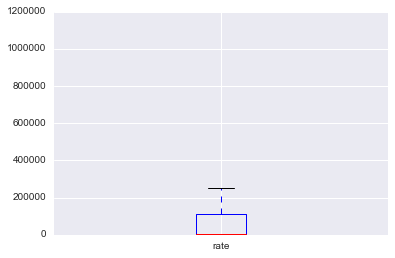

In [13]:
# Boxplots - Ravi each of the five by attack label
# other visualizations as found
import matplotlib.pyplot as plt
plt.boxplot(x=[df.sttl],labels=['sttl'])
plt.show()

plt.boxplot(x=[df.dttl],labels=['dttl'])
plt.show()

plt.boxplot(x=[df.trans_depth],labels=['trans_depth'])
plt.show()

plt.boxplot(x=[df.ct_srv_src],labels=['ct_srv_src'])
plt.show()

plt.boxplot(x=[df.ct_dst_src_ltm],labels=['ct_dst_src_ltm'])
plt.show()

plt.boxplot(x=[df.rate],labels=['rate'])
plt.show()

### Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. 
    - Explain any interesting relationships.

In [33]:
# Heat plots

### Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

In [ ]:
# Randy

#positive correlation:
#    sttl : 0.5
#    ct_dst_sport_ltm : 0.39
#    ct_src_dport_ltm : 0.34
#negative correlation:
#    swin : 0.41
#    dwin : 0.37

## Randy - Do additional visualization to find something interesting
When it is attack, the swin value is either 0 or 255, where as normal traffic has ranges between 0 and 255 inclusive.
    - 30k attack records when swin/dwin is 0
    - 15k attack records when swin/dwin is 255
    
Next break down by attack categories - most are the generic category *(cipher attack)*

 ### Are there other features that could be added to the data or created from existing features? Which ones? 

In [ ]:
# team 

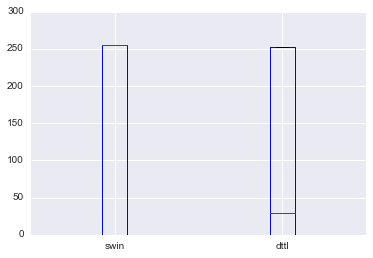

In [42]:
plt.boxplot(x=[df.swin, df.dttl], labels=["swin", "dttl"])
plt.show()